In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway
%matplotlib inline

In [53]:
# Credits:
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
# Archipelago (Antarctica) penguin data. R package version 0.1.0.
# https://allisonhorst.github.io/palmerpenguins/
url = 'https://gist.githubusercontent.com/slopp/'+ \
      'ce3b90b9168f2f921784de84fa445651/raw/' + \
      '4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv'
df = pd.read_csv(url)

<img src='https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png' width=400/>

**Image 1.** Penguins drawing. Artwork by @allison_hors.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [55]:
df.sample(10)

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
132,133,Adelie,Dream,36.8,18.5,193.0,3500.0,female,2009
19,20,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007
150,151,Adelie,Dream,36.0,17.1,187.0,3700.0,female,2009
188,189,Gentoo,Biscoe,42.6,13.7,213.0,4950.0,female,2008
281,282,Chinstrap,Dream,45.2,17.8,198.0,3950.0,female,2007
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
148,149,Adelie,Dream,36.0,17.8,195.0,3450.0,female,2009
10,11,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
40,41,Adelie,Dream,36.5,18.0,182.0,3150.0,female,2007
60,61,Adelie,Biscoe,35.7,16.9,185.0,3150.0,female,2008


<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=400/>

**Image 2.** Penguins dimensions. Artwork by @allison_hors.

In [56]:
df = df.dropna(subset=['bill_depth_mm','bill_length_mm'])
df.shape

(342, 9)

In [57]:
df.describe()

,rowid,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,172.701754,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,99.174948,5.459584,1.974793,14.061714,801.954536,0.817168
min,1.000000,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,87.250000,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,172.500000,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,257.750000,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,344.000000,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [58]:
df[['species','island']].value_counts()

species    island   
Gentoo     Biscoe       123
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     51
           Biscoe        44
dtype: int64

In [59]:
pd.crosstab(df['species'],[df['island'],df['species']])

island    Biscoe         Dream           Torgersen
species   Adelie Gentoo Adelie Chinstrap    Adelie
species                                           
Adelie        44      0     56         0        51
Chinstrap      0      0      0        68         0
Gentoo         0    123      0         0         0

In [60]:
df.groupby('species')['flipper_length_mm'].agg(['mean','median','std','max','min'])

,mean,median,std,max,min
species,,,,,
Adelie,189.953642,190.0,6.539457,210.0,172.0
Chinstrap,195.823529,196.0,7.131894,212.0,178.0
Gentoo,217.186992,216.0,6.484976,231.0,203.0


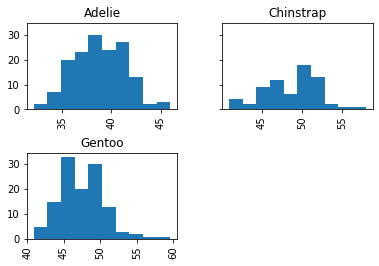

In [61]:
df.hist(column='bill_length_mm', by='species', sharey=True)
plt.show()

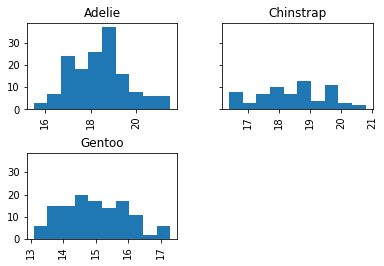

In [62]:
df.hist(column='bill_depth_mm', by='species', sharey=True)
plt.show()

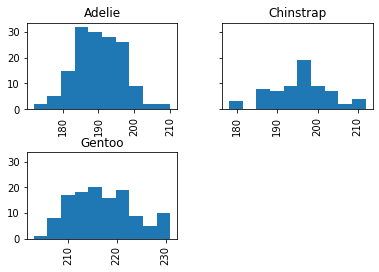

In [63]:
df.hist(column='flipper_length_mm', by='species', sharey=True)
plt.show()

/Users/alexismena/opt/miniconda3/envs/Commons/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



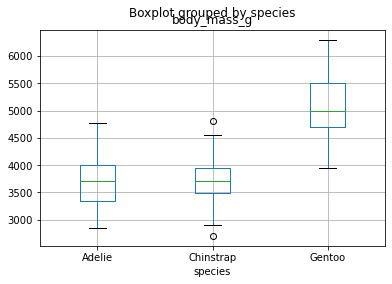

In [64]:
df.boxplot(column='body_mass_g', by='species')
plt.show()

In [65]:
fig = px.box(df, x='species', y='body_mass_g', color='species', points='all', notched=True)
fig.show()

In [66]:
fig = px.scatter(df, x='bill_length_mm', y='bill_depth_mm', color='species')
fig.show()

In [67]:
fig = px.scatter_matrix(df, dimensions=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g'], color='species')
fig.show()

In [68]:
# What percentage of Gentoo penguins weights less than 5000 (visually)
fig = px.ecdf(df[df['species']=='Gentoo'], x='body_mass_g')
fig.show()

In [69]:
fig = px.histogram(df, x='body_mass_g', color='species')
fig.show()

In [71]:
fig = px.box(df[df['species']=='Adelie'], x='species',y='body_mass_g', color='island')
fig.show()

In [70]:
# Is there a difference between Adelie penguins from each island?
# alpha = 0.05
# reject_H0 = p_value < alpha 
# Ref. https://nathancarter.github.io/how2data/site/how-to-do-a-one-way-analysis-of-variance-anova-in-python-using-scipy/
adelie_dream = df[(df['species']=='Adelie') & (df['island']=='Dream')]
adelie_biscoe = df[(df['species']=='Adelie') & (df['island']=='Biscoe')]
adelie_torgersen = df[(df['species']=='Adelie') & (df['island']=='Torgersen')]

f_oneway(adelie_dream['body_mass_g'], adelie_biscoe['body_mass_g'], adelie_torgersen['body_mass_g'])

F_onewayResult(statistic=0.03204821591407108, pvalue=0.9684666047614272)